Because the world needed yet another random walk code...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(dimension, nsamples, nruns):
    generator = np.random.default_rng()
    rng = generator.integers(0,2*dimension,size=(nruns,nsamples))
    movement=np.zeros((dimension,nruns,nsamples))

    for i in range(dimension):
        label = 2*i
        movement[i,rng==(0+label)]=1
        movement[i,rng==(1+label)]=-1

    location=np.cumsum(movement,axis=2)
    return location

def plot_random_walk(locations):
    nruns = locations.shape[1]
    ndimensions = locations.shape[0]
    nsamples = locations.shape[2]
    
    plt.rc('font', size=20) #controls default text size
    plt.rc('axes', titlesize=20) #fontsize of the title
    plt.rc('axes', labelsize=20) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
    plt.rc('legend', fontsize=20) #fontsize of the legend
    
    if ndimensions == 1:
        for i in range(nruns):
            figure = plt.figure(figsize=(12, 9))
            plt.plot([i for i in range(nsamples)],locations[0,i],c='black')
            sc = plt.scatter([i for i in range(nsamples)],locations[0,i],s=70,c=range(nsamples))
            plt.colorbar(sc, label="number of steps")
            plt.title("1D Random Walk\n Final Distance = "+str(round(get_distance_from_zero(locations, at_step=-1)[i],1)))
            plt.show()
    
    if ndimensions == 2:
        for i in range(nruns):
            figure = plt.figure(figsize=(12, 9))
            plt.plot(locations[0,i],locations[1,i],c='black')
            sc = plt.scatter(locations[0,i],locations[1,i],s=70,c=range(nsamples))
            plt.colorbar(sc, label="number of steps")
            plt.title("2D Random Walk\n Final Distance = "+str(round(get_distance_from_zero(locations, at_step=-1)[i],1)))
            plt.show()
            
    if ndimensions >= 3:
        print("Maybe I will get around to this in the future")
        
            
def get_distance_from_zero(locations, at_step=None):
    if at_step==None:
        return np.linalg.norm(locations[:,:,:],axis=0)
    else:
        return np.linalg.norm(locations[:,:,at_step],axis=0)
    


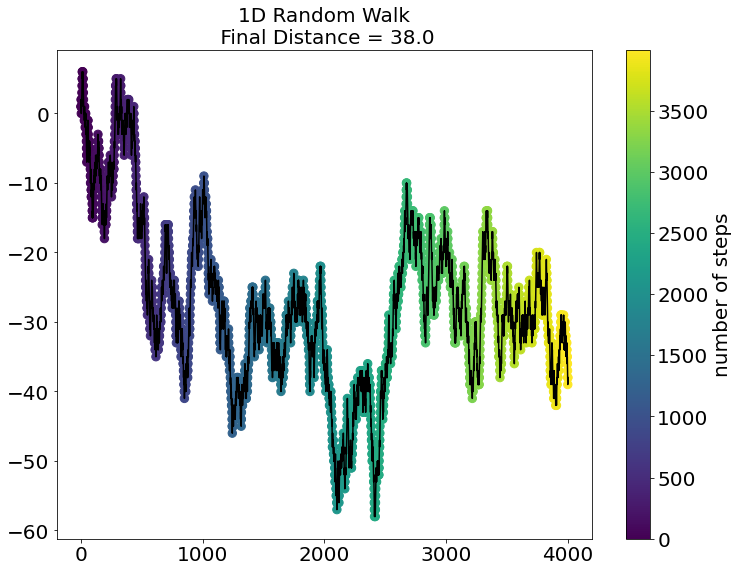

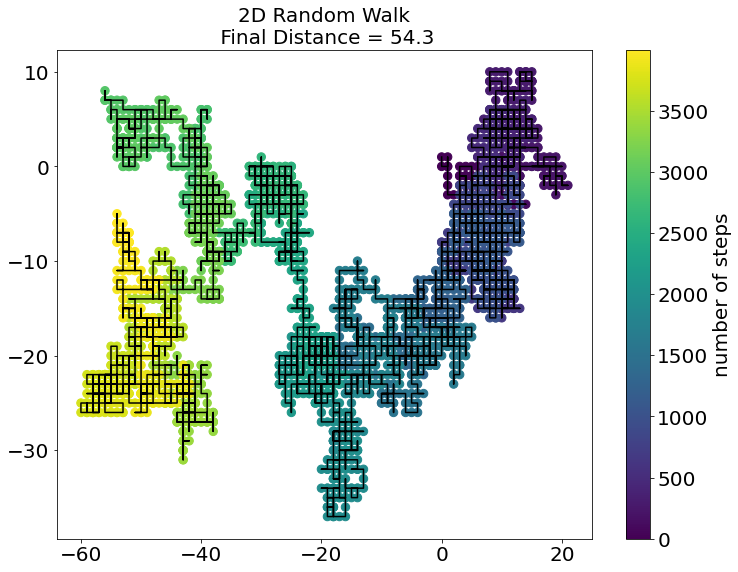

In [7]:
#test 1D random walk
nruns=1 #Number of random walk experiments to perform
nsamples=4000 #Number of steps to walk in each experiment
dimension=1 #dimensions the 
locations=random_walk(dimension,nsamples,nruns)

plot_random_walk(locations)

#test 2D random walk
nruns=1
nsamples=4000
dimension=2
locations=random_walk(dimension,nsamples,nruns)

plot_random_walk(locations)


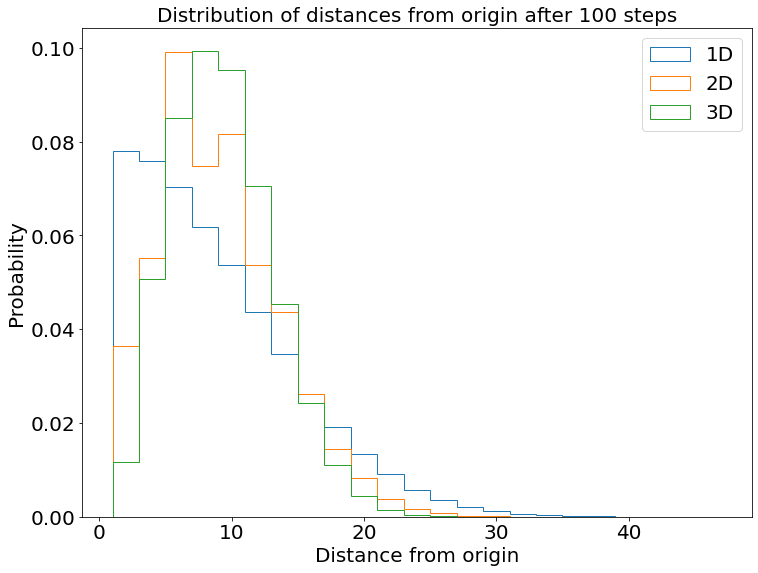

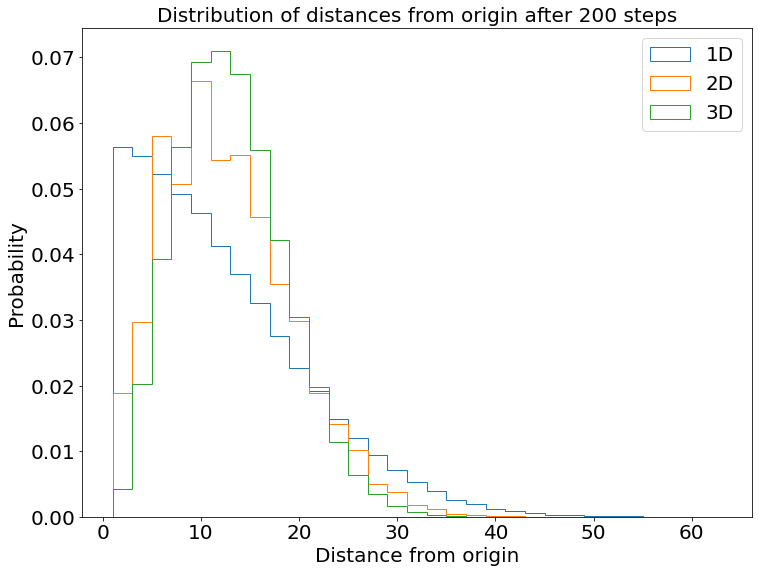

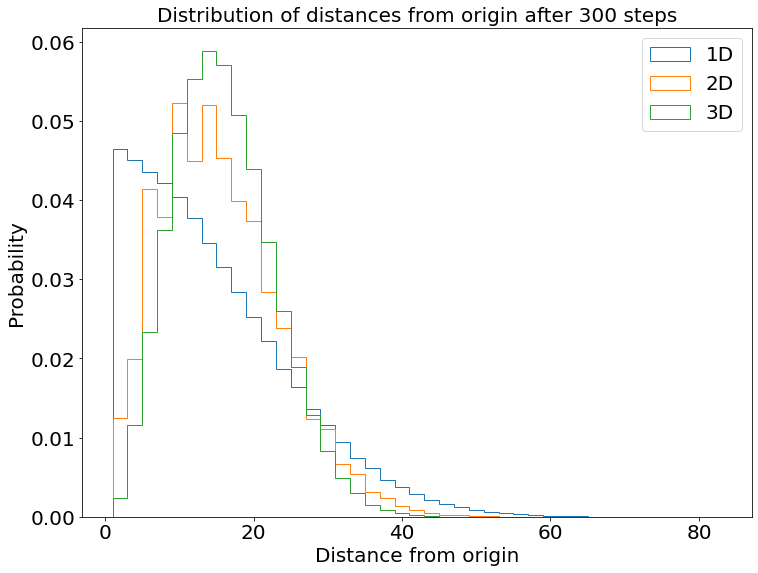

In [5]:
nruns = 200000 #number of random walks to perform
nsteps = 400 #number of steps to perform in each random walk
max_dim = 3
locations=[]

for dimension in range(1,max_dim+1):
    locations.append(random_walk(dimension,nsteps,nruns))

for steps in range(100,nsteps,100):
    figure = plt.figure(figsize=(12, 9))
    for dimension in range(1, max_dim +1):
        final_distance=get_distance_from_zero(locations[dimension-1],steps)
        plt.hist(final_distance,
                 density=True,
                 histtype='step',
                 bins=np.arange(min(final_distance), max(final_distance) + 1, 2),
                 label=str(dimension)+"D")
    plt.title("Distribution of distances from origin after "+str(steps)+" steps")
    plt.ylabel("Probability")
    plt.xlabel("Distance from origin")
    plt.legend()
    plt.show()
